<a href="https://colab.research.google.com/github/KagontleBooysen/ols-correlation-analysis/blob/main/Exercise_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**# Exercise 5 — Data processing and Multiple Linear Regression**


# ==========================================
# 📘 Exercise 5 — Data Processing & Regression
# ==========================================

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path_students = "/content/drive/MyDrive/data/students.csv"
path_performance = "/content/drive/MyDrive/data/performance.csv"

# ==========================================
# E5.1 — Data Processing
# ==========================================

In [4]:
# 1) Create Series from performance.csv
S_performance = pd.read_csv(path_performance).squeeze("columns")

In [5]:
# 2) Create DataFrame from students.csv
DF_students = pd.read_csv(path_students)

In [6]:
# 3) Concatenate Series + DataFrame
DF_combined = pd.concat([DF_students, S_performance], axis=1)

In [8]:
# Reorder columns
column_order = [
    "Previous Scores", "Hours Studied", "Sleep Hours",
    "Extracurricular Activities", "Sample Question Papers Practiced",
    "Performance Index"
]
DF_combined = DF_combined[column_order]

In [10]:
# 4) Fill missing values with column averages
DF_combined = DF_combined.fillna(DF_combined.mean(numeric_only=True))

print("✅ Combined DataFrame (first 5 rows):")
print(DF_combined.head())

✅ Combined DataFrame (first 5 rows):
   Previous Scores  Hours Studied  Sleep Hours Extracurricular Activities  \
0               99            7.0          9.0                        Yes   
1               82            4.0          4.0                         No   
2               51            8.0          7.0                        Yes   
3               52            5.0          5.0                        Yes   
4               75            7.0          8.0                         No   

   Sample Question Papers Practiced  Performance Index  
0                               1.0                 91  
1                               2.0                 65  
2                               2.0                 45  
3                               2.0                 36  
4                               5.0                 66  


# ==========================================
# E5.2 — Multiple Linear Regression
# ==========================================

<Figure size 1500x700 with 0 Axes>

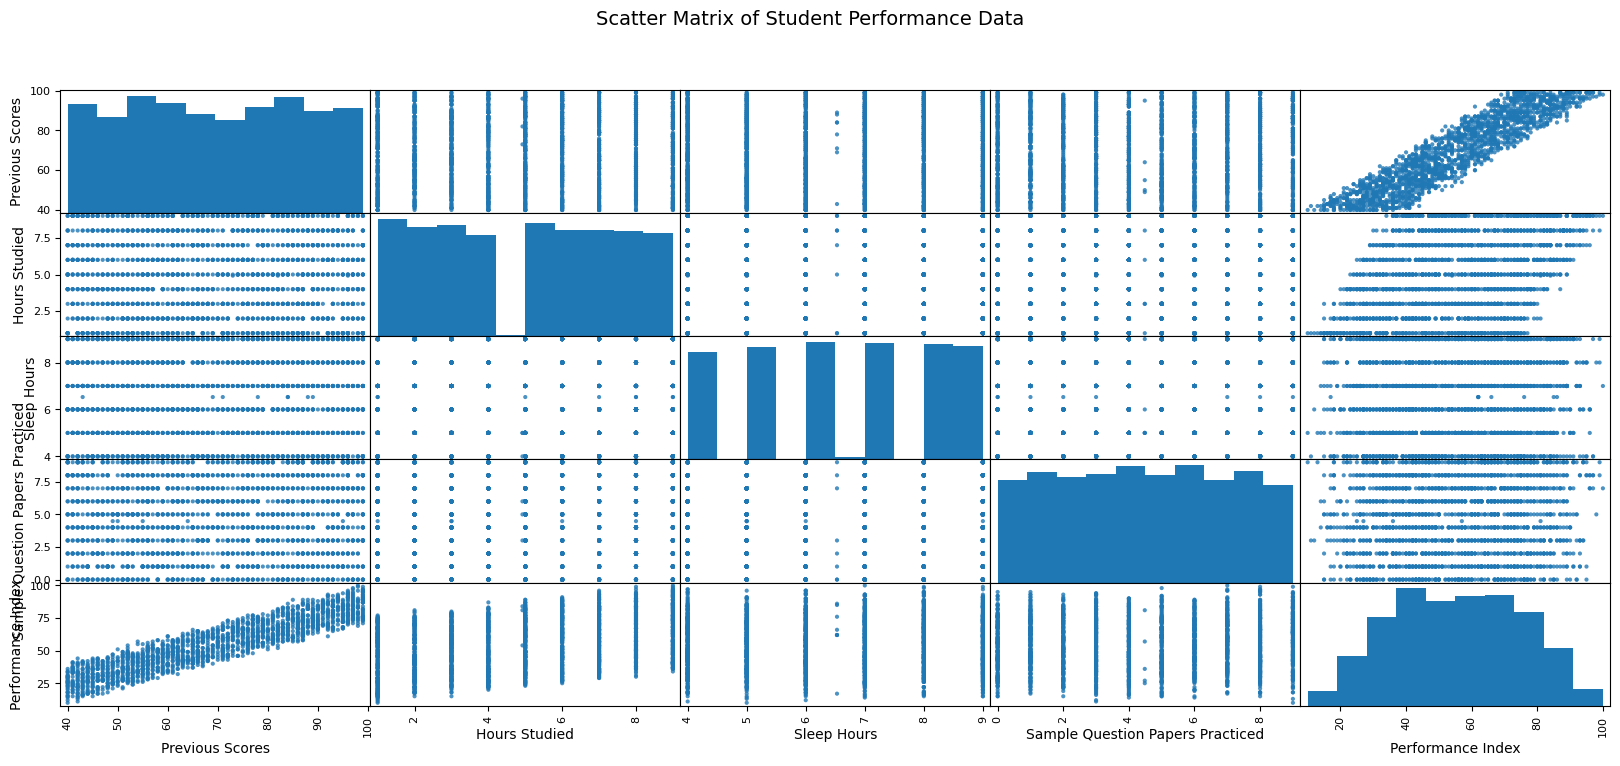

In [11]:
# 1) Scatter Matrix
plt.figure(figsize=(15, 7))
scatter_matrix(DF_combined, figsize=(20, 8), diagonal='hist', alpha=0.8)
plt.suptitle("Scatter Matrix of Student Performance Data", fontsize=14)
plt.show()

In [12]:
# 2) Select relevant features and target
X = DF_combined[["Hours Studied", "Previous Scores"]]
y = DF_combined["Performance Index"]

In [13]:
# Fit regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [14]:
print("\n📊 Regression Results:")
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"R² Score: {model.score(X, y):.4f}")


📊 Regression Results:
Coefficients: [2.84418506 1.02350795]
Intercept: -30.073192736414157
R² Score: 0.9859


In [21]:
print(DF_combined[["Hours Studied", "Previous Scores"]].describe())

       Hours Studied  Previous Scores
count    2000.000000      2000.000000
mean        4.923886        69.476500
std         2.589318        17.449002
min         1.000000        40.000000
25%         3.000000        54.000000
50%         5.000000        69.000000
75%         7.000000        85.000000
max         9.000000        99.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


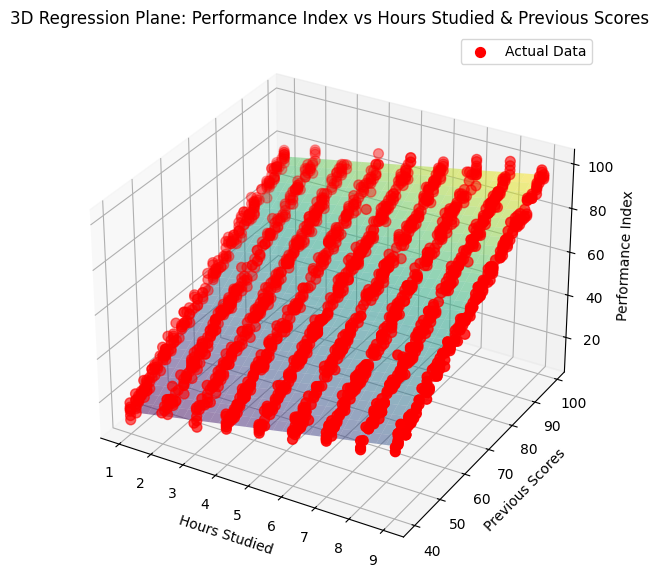

In [22]:
# --- 3D Visualization of Multiple Linear Regression ---
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed for 3D plotting

# Scatter data
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Data points
ax.scatter(
    X["Hours Studied"],
    X["Previous Scores"],
    y,
    c='red', s=50, label='Actual Data'
)

# Create grid to plot regression plane
x_range = np.linspace(X["Hours Studied"].min(), X["Hours Studied"].max(), 30)
y_range = np.linspace(X["Previous Scores"].min(), X["Previous Scores"].max(), 30)
x_surf, y_surf = np.meshgrid(x_range, y_range)

# Predict z-values using the regression model
z_pred = model.predict(np.c_[x_surf.ravel(), y_surf.ravel()])
z_pred = z_pred.reshape(x_surf.shape)

# Plot the regression surface
ax.plot_surface(x_surf, y_surf, z_pred, alpha=0.5, cmap='viridis', edgecolor='none')

# Labels and title
ax.set_xlabel("Hours Studied")
ax.set_ylabel("Previous Scores")
ax.set_zlabel("Performance Index")
ax.set_title("3D Regression Plane: Performance Index vs Hours Studied & Previous Scores")

plt.legend()
plt.show()